<a href="https://colab.research.google.com/github/DhruvAgg10/Python-projects/blob/main/carpricepred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

we need to predict price so its a regression problem therefore we will be using linear regression and its better version i.e lasso regression
`

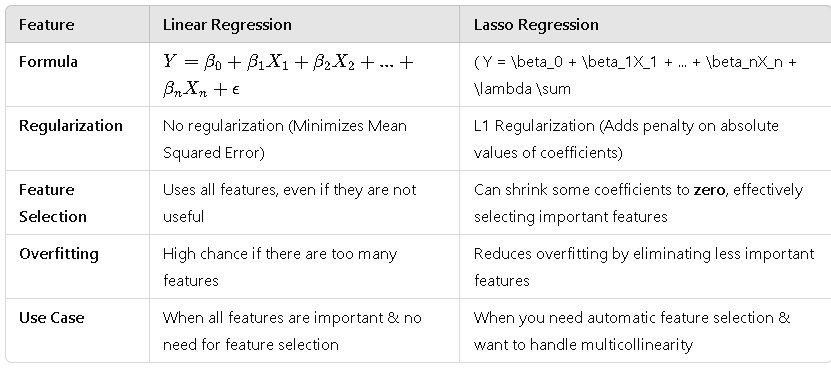

In [172]:
import numpy as np
import pandas as pd
#import test train split
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
#import linear regression
from sklearn.linear_model import LinearRegression
#import lasso regression
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor
#trying to imorve acc using label encoding rather than manual encoding
from sklearn.preprocessing import LabelEncoder

In [173]:
dataset=pd.read_csv('/content/CAR DETAILS FROM CAR DEKHO.csv')

In [174]:
dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [175]:
#check for null values
dataset.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [176]:
dataset['fuel'].value_counts()

,count
fuel,
Diesel,2153
Petrol,2123
CNG,40
LPG,23
Electric,1


In [177]:
dataset['owner'].value_counts()

,count
owner,
First Owner,2832
Second Owner,1106
Third Owner,304
Fourth & Above Owner,81
Test Drive Car,17


In [178]:
dataset['transmission'].value_counts()

,count
transmission,
Manual,3892
Automatic,448


In [179]:
dataset['seller_type'].value_counts()

,count
seller_type,
Individual,3244
Dealer,994
Trustmark Dealer,102


In [180]:
#encode text data
dataset.replace({'seller_type':{'Individual':0, 'Dealer':1, 'Trustmark Dealer':2},'transmission':
                 {'Manual':0, 'Automatic':1},'owner':{'First Owner':0, 'Second Owner':1, 'Third Owner':2,
                                                     'Fourth & Above Owner':3,'Test Drive Car':4},
                'fuel':{'Diesel':0, 'Petrol':1, 'CNG':2, 'LPG':3, 'Electric':4}} ,inplace=True )


<ipython-input-180-8db8bf8d2653>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({'seller_type':{'Individual':0, 'Dealer':1, 'Trustmark Dealer':2},'transmission':


In [181]:
#SPLIT THE DATA AND STORE PRICE SEPERARATELY
X=dataset.drop(columns='selling_price',axis=1)
Y=dataset['selling_price']
X=X.drop(columns='name',axis=1)
print(X)

      year  km_driven  fuel  seller_type  transmission  owner
0     2007      70000     1            0             0      0
1     2007      50000     1            0             0      0
2     2012     100000     0            0             0      0
3     2017      46000     1            0             0      0
4     2014     141000     0            0             0      1
...    ...        ...   ...          ...           ...    ...
4335  2014      80000     0            0             0      1
4336  2014      80000     0            0             0      1
4337  2009      83000     1            0             0      1
4338  2016      90000     0            0             0      0
4339  2016      40000     1            0             0      0

[4340 rows x 6 columns]


In [182]:
#from statsmodels.stats.outliers_influence import variance_inflation_factor
#X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

#vif_data = pd.DataFrame()
#vif_data["Feature"] =  X_scaled_df.columns
#vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

#print(vif_data) output is in good and med range therefore correct here
#

Variance Inflation Factor (VIF) helps detect multicollinearity (when predictor variables are highly correlated). Here's how to interpret your results:

VIF < 5 → Low multicollinearity (Good)
VIF between 5-10 → Moderate multicollinearity (May need attention)
VIF > 10 → High multicollinearity (Should be removed or transforme

In [183]:
#split into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [184]:
model=LinearRegression()

In [185]:
model.fit(X_train,Y_train)

LinearRegression()

In [186]:
train_pred=model.predict(X_train)
#r2 score
test_acc = r2_score(Y_train, train_pred)
print(train_r2)
test_pred=model.predict(X_test)
test_acc=r2_score(Y_test, test_pred)
print(test_acc)

0.43922410637048936
0.49988298730549385


In [187]:
# Creating and training the Lasso model
lasso = Lasso(alpha=0.1)  # Alpha controls regularization strength
lasso.fit(X_train, Y_train)

# Making predictions
predictions = lasso.predict(X_test)
error_score = r2_score(Y_test, predictions)
print(error_score)

0.49988295964671736


In [188]:
# Train XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, enable_categorical=True, random_state=42)
xgb_model.fit(X_train, Y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate model
error_score_xgb = r2_score(Y_test, y_pred_xgb)
print(error_score_xgb)

0.7082017660140991
